<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))
model.save('mnist_model.keras')

In [9]:
model = load_model('mnist_model.keras')

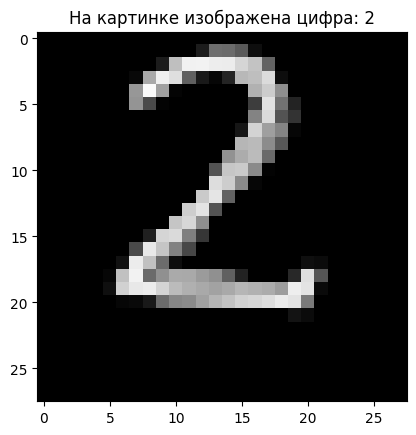

In [18]:
test_image = load_img('2.png', color_mode='grayscale', target_size=(28, 28))
test_image = img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image, verbose=0)
class_index = np.argmax(prediction)

plt.title(f"На картинке изображена цифра: {class_index}")
image = plt.imread('2.png')
plt.imshow(image)
plt.show()